In [1]:
import numpy as np
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from config import config

In [2]:
def read_mongo(collection, query={}):
    """ Read from Mongo and Store into DataFrame """

    # Make a query to the specific DB and Collection
    cursor = collection.find(query)
    
    elements = []
    for doc in cursor:
        del doc['_id']
        elements.append(doc)
        
    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(elements)
    
    return df

In [3]:
REPO = 'prestodb/presto'

In [4]:
mongoClient = pymongo.MongoClient(config['DATABASE']['CONNECTION_STRING'])
db = mongoClient[config['DATABASE']['NAME']]
collection = db[f'{REPO}_results']

lastIssue = collection.find().sort('number', -1).limit(1)[0]['number']

df = read_mongo(collection, {'number': {'$gte': lastIssue - 6000}})
df.head()

,compare,filtros,number,tecnica,topk,acertos,arquivos,arquivos_resolvidos_de_verdade,arquivos_sugeridos,data,erros,issue,mapk,max_sim,mediana_sim,min_sim,repositorio
0,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",12413,tfidf,5,0,8,[presto-orc/src/main/java/com/facebook/presto/...,[presto-hive/src/main/java/com/facebook/presto...,2019-06-01T02:36:04Z,5,"Backport ""Create Block directly if the Data st...",0.0,0.204337,0.143791,0.125531,prestodb/presto
1,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",13191,tfidf,5,0,6,[presto-hive/src/test/java/com/facebook/presto...,[presto-main/src/main/java/com/facebook/presto...,2019-08-29T18:21:36Z,3,Add SelectiveStreamReader for columns of type ...,0.0,0.290649,0.205489,0.175766,prestodb/presto
2,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",12500,tfidf,5,0,3,[presto-main/src/main/java/com/facebook/presto...,[presto-main/src/main/java/com/facebook/presto...,2020-02-28T23:27:40Z,9,Support FNV hash functions,0.0,0.231481,0.202683,0.179066,prestodb/presto
3,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",14423,tfidf,5,0,3,[presto-docs/src/main/sphinx/functions/qdigest...,[presto-main/src/main/java/com/facebook/presto...,2020-06-09T14:23:51Z,21,Create quantile_at_value for QDigest type,0.0,0.248578,0.199658,0.167070,prestodb/presto
4,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",14011,tfidf,5,0,21,[presto-hive-common/src/main/java/com/facebook...,[presto-docs/src/main/sphinx/functions/string....,2020-06-25T18:28:17Z,36,Replace FileSystemContext with HdfsContext,0.0,0.226585,0.000000,0.000000,prestodb/presto


# Histplot


<AxesSubplot: xlabel='number', ylabel='Count'>

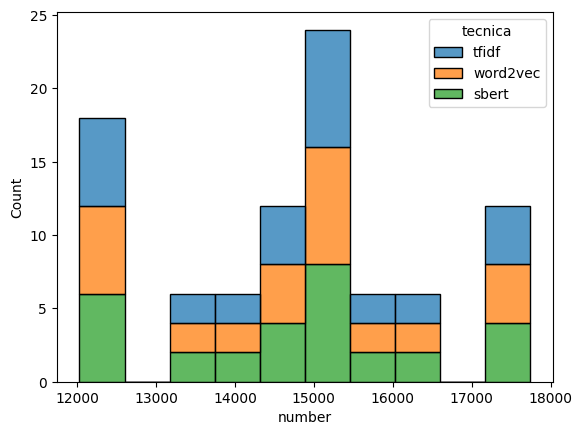

In [5]:
sns.histplot(df, x='number', bins=10, stat='count', hue='tecnica', multiple='stack')

# Mapk

<AxesSubplot: xlabel='topk', ylabel='mapk'>

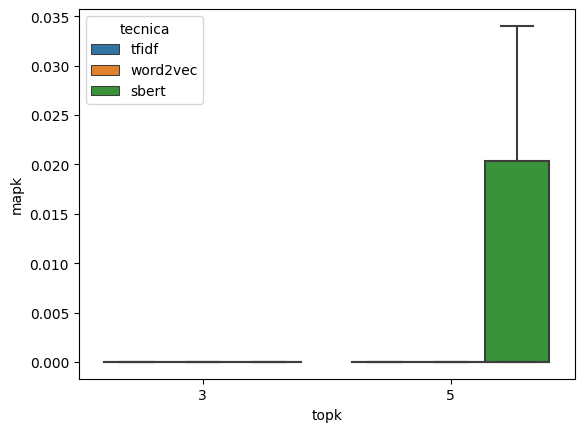

In [6]:
sns.boxplot(df, x="topk", y="mapk", hue="tecnica", showfliers=False)

# Similaridades maiores

<AxesSubplot: xlabel='topk', ylabel='max_sim'>

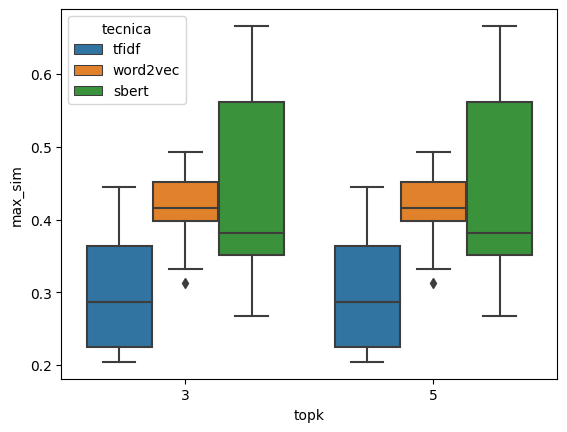

In [7]:
sns.boxplot(df, x="topk", y="max_sim", hue="tecnica")

# Similaridades menores

<AxesSubplot: xlabel='topk', ylabel='min_sim'>

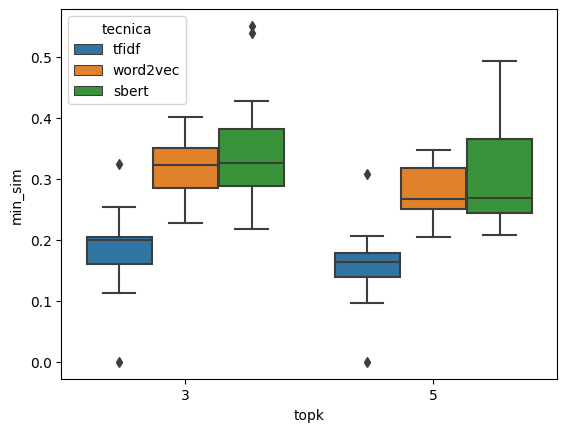

In [8]:
sns.boxplot(df, x="topk", y="min_sim", hue="tecnica")

# Acertos

<AxesSubplot: xlabel='topk', ylabel='acertos'>

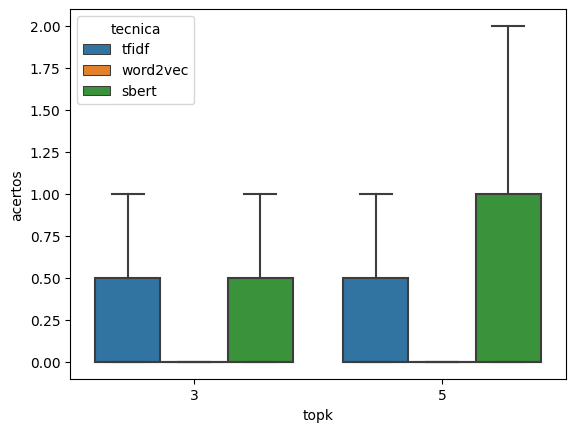

In [9]:
sns.boxplot(df, x="topk", y="acertos", hue="tecnica", showfliers=False)

<AxesSubplot: xlabel='topk', ylabel='acertos'>

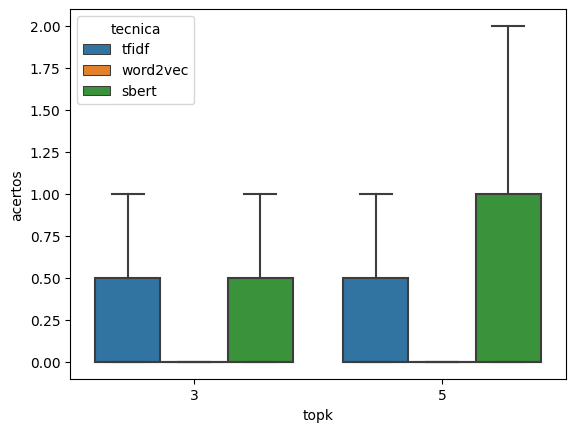

In [10]:
sns.boxplot(df, x="topk", y="acertos", hue="tecnica", showfliers=False)